Practicing linear regression

In [55]:
from imports import (
    np, pd, xr, plt, os, LinearRegression,
    metrics)

%matplotlib inline

In [56]:
nird_data = ''

model1 = '20191122_161009_sample_param_set_wbf1_inp1.nc'
model2 = '20191127_162007_sample_param_set_wbf0_01_inp1.nc'

case = model1[:-3]

model_dir = '/home/jonahks/drivemount/mnth15runs/%s/' % case

In [57]:
os.getcwd()

'/home/jonahks/git_repos/netcdf_analysis'

In [58]:
os.listdir(model_dir)

['MPC_COMPARE_CALIOP_NorESM.csv',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-12.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0002-02.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-08.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-06.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-03.nc',
 '20191122_161009_sample_param_set_wbf1_inp1_slf_caliop_comparison.csv',
 '20191122_161009_sample_param_set_wbf1_inp1.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-05.nc',
 '20191122_161009_sample_param_set_wbf1_inp1_noresm_slf_isotherms.png',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0002-03.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-07.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.i.0002-01-01-00000.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-09.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-04.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam

In [59]:
data_string1 = '%s%s_slf_caliop_comparison.csv' % (model_dir, case)
os.path.exists(data_string)

True

In [60]:
ds = pd.read_csv(data_string1)
ds_clean = ds.dropna()

In [66]:
ds

,Isotherm,CALIOP_10N-10S,CALIOP_10S-30S,CALIOP_30N-10N,CALIOP_30S-50S,CALIOP_50N-30N,CALIOP_50S-70S,CALIOP_70N-50N,CALIOP_70S-90S,CALIOP_90N-70N,...,NorESM_10S-30S,NorESM_30N-10N,NorESM_30S-50S,NorESM_50N-30N,NorESM_50S-70S,NorESM_70N-50N,NorESM_70S-90S,NorESM_90N-70N,Arctic Error,Global Error
0,-40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.649523,0.701112,0.734191,0.762072,0.910711,0.676523,1.686440,0.561619,0.561619,0.714611
1,-35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.610600,4.394250,4.111197,5.130808,6.590327,5.412660,10.205861,7.450647,NaN,NaN
2,-30.0,4.0,6.0,5.0,7.0,3.0,9.0,5.0,12.0,6.0,...,5.272700,5.793299,6.189978,6.756526,12.026680,8.753282,14.389367,8.948410,2.948410,1.445471
3,-25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.376077,9.885155,8.586427,9.683207,19.638274,13.554638,18.113367,12.320968,NaN,NaN
4,-20.0,26.0,32.0,28.0,30.0,21.0,37.0,26.0,39.0,31.0,...,11.964153,12.054469,15.180630,14.878921,28.873837,20.999265,25.780514,20.709251,-10.290749,-13.107442
5,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.797055,22.941324,24.099069,22.659865,40.475013,30.386068,34.852534,32.392770,NaN,NaN
6,-10.0,62.0,64.0,63.0,60.0,56.0,70.0,56.0,61.0,55.0,...,30.198966,30.272848,42.999595,32.691968,50.902777,42.500702,44.331243,46.999692,-8.000308,-26.125227
7,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.546246,42.898626,66.906519,51.781221,65.018515,59.755126,51.124978,67.800582,NaN,NaN
8,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,87.985580,82.179623,92.512950,81.682527,86.840288,83.434027,58.937341,84.650561,-15.349439,-13.327181


In [65]:
X_train = np.array(ds_clean['Isotherm']).reshape(-1,1)
y_train = np.array(ds_clean['Arctic Error']).reshape(-1,1)
sklearn_regressor = LinearRegression().fit(X_train, y_train) # Train with the right independent/dependent variables

score = sklearn_regressor.score(X_train, y_train) # R2 coefficient

#To retrieve the intercept:
print(sklearn_regressor.intercept_)#For retrieving the slope:
print(sklearn_regressor.coef_)

y_pred = sklearn_regressor.predict(X_train)

[-14.58026012]
[[-0.42770834]]


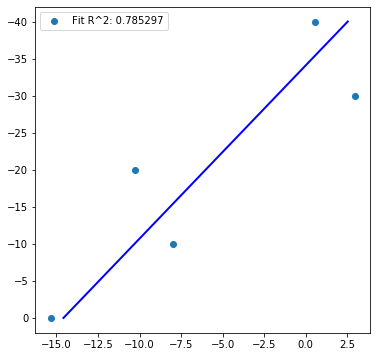

In [64]:
fig1 = plt.figure(figsize=(6,6))#constrained_layout=True)
fig1.gca().invert_yaxis()

plt.scatter(ds_clean['Arctic Error'], ds_clean['Isotherm'], label = ('Fit R^2: %f' % score))
plt.plot(y_pred, X_train, color='blue', linewidth=2)
plt.legend()
plt.show()